In [7]:
#Importar a biblioteca Pandas 
import pandas as pd

In [8]:
df1 = pd.read_excel("dataset/Aracaju.xlsx")
df2 = pd.read_excel("dataset/Fortaleza.xlsx")
df3 = pd.read_excel("dataset/Natal.xlsx")
df4 = pd.read_excel("dataset/Recife.xlsx")
df5 = pd.read_excel("dataset/Salvador.xlsx")

In [9]:
df3.head()
#Trabalho com planilhas Excel 03:00

,Cidade,Data,Vendas,LojaID,Qtde
0,Natal,2018-08-27,606.0,853,2
1,Natal,2018-11-25,563.0,853,2
2,Natal,2019-03-11,308.0,852,3
3,Natal,2019-01-07,271.0,854,3
4,Natal,2019-03-09,699.0,853,3


In [10]:
df = pd.concat([df1,df2,df3,df4,df5])

In [11]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [12]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [13]:
#Pegar amostra de linhas 
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
112,Aracaju,2018-01-01,4.52,1522,8
202,Salvador,2019-01-02,22.45,1036,1
28,Fortaleza,2019-01-01,34.88,1004,3
108,Fortaleza,2019-03-02,152.89,981,4
22,Natal,2018-06-21,621.00,853,3


In [14]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [15]:
df["LojaID"] = df["LojaID"].astype("object")

In [16]:
df.dtypes


Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [17]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [18]:
#valores nulos ficaram com media(em memória) - tabela nao tem valores nulos no momento, só fixando 
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [19]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [20]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
39,Recife,2019-01-01,143.58,981,3
44,Salvador,2019-01-01,43.26,1037,2
38,Aracaju,2018-01-01,142.46,1520,1
99,Aracaju,2018-01-01,139.32,1521,3
65,Salvador,2019-01-01,3.39,1034,2
24,Aracaju,2018-01-01,151.04,1522,6
103,Aracaju,2018-01-01,12.62,1522,3
45,Natal,2019-03-11,431.00,852,3
83,Fortaleza,2019-01-01,3.88,1002,6
206,Salvador,2019-01-02,151.45,1036,2


In [21]:
#média de vendas
df["Vendas"].mean()

122.61180089485438

In [22]:
#substituir valores vazios por 0 - fixando 
df["Vendas"].fillna(0, inplace=True)

In [23]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [24]:
#caso tenha valores 0, forma de apagar:
df.dropna(inplace=True)

In [25]:
# deletar onde a coluna vendas aparece valores nulos 
df.dropna(subset=["Vendas"], inplace=True)

In [26]:
#remover colunas com valores faltantes=
df.dropna(how="all", inplace=True) 

In [27]:
#criando uma coluna receita  
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [28]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [29]:
#caso a quantidade não fosse mostrada, e tivesse a receita antes,
#A criação de coluna poderia ser realizada dessa forma: 
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [30]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [31]:
df["Receita"].max()

3544.0

In [32]:
df["Receita"].min()

3.34

In [33]:
# As 3 maiores receitas 
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [34]:
#As 3 piores receitas
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [35]:
#agrupamento da soma de receita por cidades 
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [36]:
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


In [37]:
#Transformando em Interio 
df["Data"] = df["Data"].astype("int64") 

In [41]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [42]:
#transformando em Data novamente 
df["Data"] = pd.to_datetime(df["Data"])

In [43]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [44]:
#realizando agrupamento
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [45]:
#Criando tabela Ano
df["Ano_venda"] = df["Data"].dt.year

In [48]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda
67,Aracaju,2018-01-01,78.13,1521,4,312.52,4.0,2018
22,Recife,2019-01-01,39.53,983,3,118.59,3.0,2019
30,Aracaju,2018-01-01,119.21,1520,8,953.68,8.0,2018
43,Recife,2019-01-01,22.29,983,7,156.03,7.0,2019
9,Recife,2019-01-01,11.85,980,7,82.95,7.0,2019


In [49]:
#criando coluna venda e coluna mês:
df['mes_vendas'], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [54]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,mes_vendas,dia_venda
9,Salvador,2019-01-01,127.92,1036,1,127.92,1.0,2019,1,1
156,Salvador,2019-01-02,36.14,1037,3,108.42,3.0,2019,1,2
9,Natal,2018-05-02,261.00,852,3,783.00,3.0,2018,5,2
80,Natal,2018-05-23,264.00,852,3,792.00,3.0,2018,5,23
30,Fortaleza,2019-01-01,39.13,1005,6,234.78,6.0,2019,1,1


In [55]:
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [57]:
#Calculoda da diferença dias 
df["Diferenca_dias"] = df["Data"] - df["Data"].min()

In [58]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,mes_vendas,dia_venda,Diferenca_dias
31,Recife,2019-01-01,176.23,981,7,1233.61,7.0,2019,1,1,365 days
38,Salvador,2019-01-01,165.34,1034,3,496.02,3.0,2019,1,1,365 days
214,Salvador,2019-01-02,54.94,1036,2,109.88,2.0,2019,1,2,366 days
231,Salvador,2019-01-03,89.85,1034,2,179.70,2.0,2019,1,3,367 days
62,Salvador,2019-01-01,161.02,1037,3,483.06,3.0,2019,1,1,365 days


In [59]:
#Criação da coluna trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [61]:
df.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,mes_vendas,dia_venda,Diferenca_dias,trimestre_venda
201,Natal,2019-01-02,86.61,1036,1,86.61,1.0,2019,1,2,366 days,1
110,Natal,2019-01-02,185.93,1036,3,557.79,3.0,2019,1,2,366 days,1
210,Salvador,2019-01-02,197.64,1035,1,197.64,1.0,2019,1,2,366 days,1
22,Natal,2018-06-21,621.00,853,3,1863.00,3.0,2018,6,21,171 days,2
47,Salvador,2019-01-01,190.03,1036,2,380.06,2.0,2019,1,1,365 days,1
79,Natal,2019-02-28,557.00,852,4,2228.00,4.0,2019,2,28,423 days,1
13,Natal,2018-09-12,458.00,852,4,1832.00,4.0,2018,9,12,254 days,3
126,Recife,2019-03-02,41.87,980,8,334.96,8.0,2019,3,2,425 days,1
130,Natal,2019-01-02,59.78,1036,1,59.78,1.0,2019,1,2,366 days,1
180,Natal,2019-01-02,116.63,1035,2,233.26,2.0,2019,1,2,366 days,1


In [62]:
#filtrar vendas de 2019 do mês de março 
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month==3)]

In [66]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,mes_vendas,dia_venda,Diferenca_dias,trimestre_venda
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
133,Recife,2019-03-02,14.67,980,7,102.69,7.0,2019,3,2,425 days,1
115,Salvador,2019-03-02,202.33,1035,2,404.66,2.0,2019,3,2,425 days,1
117,Fortaleza,2019-03-02,15.42,983,8,123.36,8.0,2019,3,2,425 days,1
139,Recife,2019-03-02,141.16,980,7,988.12,7.0,2019,3,2,425 days,1
42,Natal,2019-03-02,775.00,854,2,1550.00,2.0,2019,3,2,425 days,1
140,Fortaleza,2019-03-02,166.89,983,5,834.45,5.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
113,Recife,2019-03-02,38.63,980,2,77.26,2.0,2019,3,2,425 days,1


# Visualização de dados:

In [67]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:>

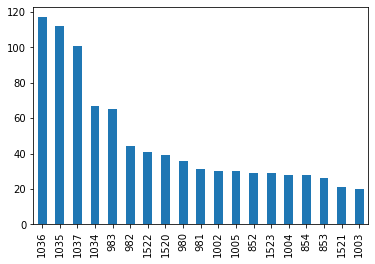

In [70]:
#gerando gráficos 
df["LojaID"].value_counts(ascending=False).plot.bar()

<AxesSubplot:>

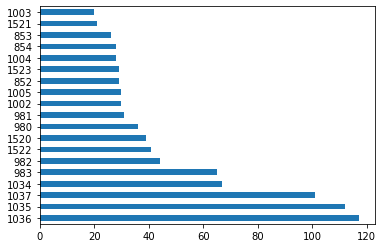

In [71]:
#gerando gráficos barras horizontais 
df["LojaID"].value_counts(ascending=False).plot.barh()

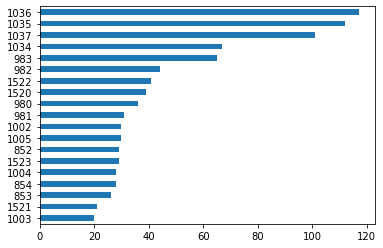

In [73]:
#gerando gráficos barras horizontais 
df["LojaID"].value_counts(ascending=True).plot.barh();

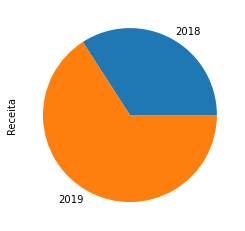

In [75]:
#realizando agrupamento com gráficos 
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [79]:
#total de vendas
df["Cidade"].value_counts()

Salvador     240
Natal        240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

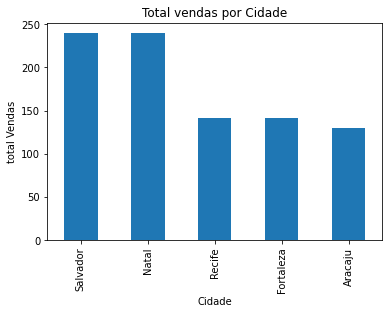

In [80]:
import matplotlib.pyplot as plt 
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("total Vendas");

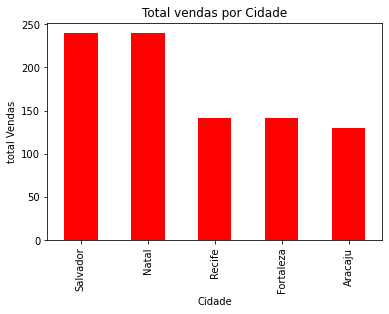

In [81]:
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("total Vendas");

In [82]:
plt.style.use("ggplot")

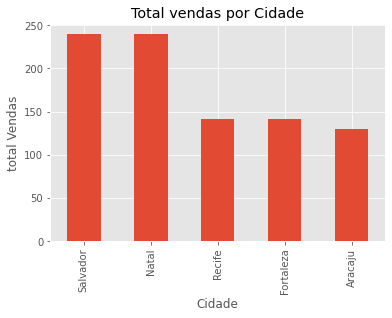

In [84]:
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("total Vendas");

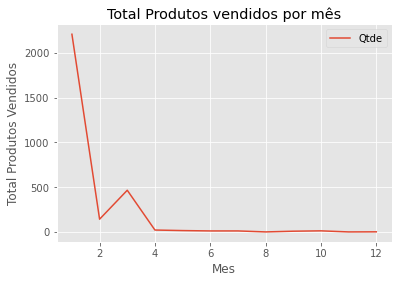

In [88]:
#Produtos vendidos por mÊs gráfico de linha 
df.groupby(df["mes_vendas"])["Qtde"].sum().plot(title="Total Produtos vendidos por mês")
plt.xlabel("Mes")
plt.ylabel("Total Produtos Vendidos")
plt.legend()


In [89]:
df.groupby(df["mes_vendas"])["Qtde"].sum()

mes_vendas
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [94]:
df_2019 =df[df["Ano_venda"] == 2019]

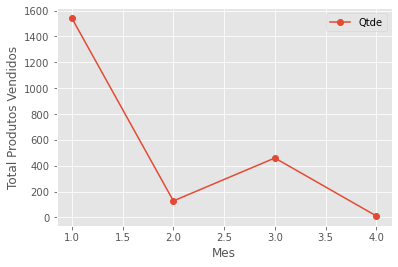

In [97]:
#Produtos vendidos por mÊs gráfico de linha 2019
df_2019.groupby(df_2019["mes_vendas"])["Qtde"].sum().plot(marker="o")
plt.xlabel("Mes")
plt.ylabel("Total Produtos Vendidos")
plt.legend()